In [ ]:
# SÉRIES TEMPORAIS

In [ ]:
# SÉRIES TEMPORAIS, p1

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Resgistro de converters para uso do matplotlib

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregamento da Base de dados

base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Visualização do tipo de dados dos atributos

print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
# Conversão dos atributos que estão no formato string para formato de data: ANO-MÊS


dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)

base.head()

# Obs: datetime -> é uma classe que possui diversos atributos e métodos para trabalhar com datas e horas ...

# ... Alguns atributos da classe datetime:
# year: O ano
# month: O mês
# day: O dia
# hour: A hora
# minute: O minuto
# second: O segundo
# microsecond: O milissegundo
# ...
# Alguns Métodos da classe datetime:
    
# strftime(): Este método retorna uma string que representa a data e hora no formato especificado. 
# strptime(): Este método retorna um objeto datetime a partir de uma string que representa a data e hora.(Usada no exemplo)
# replace(): Este método substitui os atributos de um objeto datetime.
# isoformat(): Este método retorna uma string que representa a data e hora no formato ISO8601.
# ctime(): Este método retorna uma string que representa a data e hora no formato ctime.
# asctime(): Este método retorna uma string que representa a data e hora no formato asctime.
# gmtime(): Este método retorna um objeto datetime na hora GMT.
# localtime(): Este método retorna um objeto datetime na hora local.

# Obs: parse_dates e date_parser...

# ...Os atributos parse_dates e date_parser são usados para especificar se as datas em um DataFrame devem ser parseadas 
# ...e, em caso afirmativo, qual função deve ser usada para parsear as datas...

# ...O atributo parse_dates é um booleano que especifica se as datas em um DataFrame devem ser parseadas...
# ...Se o atributo parse_dates for verdadeiro, as datas em um DataFrame serão parseadas usando...
# ...a função especificada pelo atributo date_parser.

# ...O atributo date_parser é uma função que recebe uma string como entrada e retorna um objeto datetime como saída....
# ...A função date_parser deve ser capaz de parsear datas em qualquer formato...

# ...Por exemplo, o seguinte código lê um arquivo CSV e parseia as datas no arquivo CSV usando o formato %Y-%m-%d:
# Ex: 
# import pandas as pd

# df = pd.read_csv('data.csv', parse_dates=True, date_parser='%Y-%m-%d')

# print(df.head())

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# Visualização do índice do dataframe (#Passengers)


base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Criação da Série Temporal (ts)


ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [11]:
# Visualização do registro específico pelo index


ts[3]

129

In [12]:
# Visualização por ano e mês


ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [13]:
# Visualização de data específica, usando função datetime()


ts[datetime(1949,2,1)]

118

In [14]:
# Visualização de intervalos


ts['1950-01-01':'1950-07-01']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
# Visualização de intervalos sem preencher a data de início


ts[:'1950-07-01']

In [ ]:
# Visualização por ano


ts['1950']

In [15]:
# Valores máximos


ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
# Valores mínimos


ts.index.min()

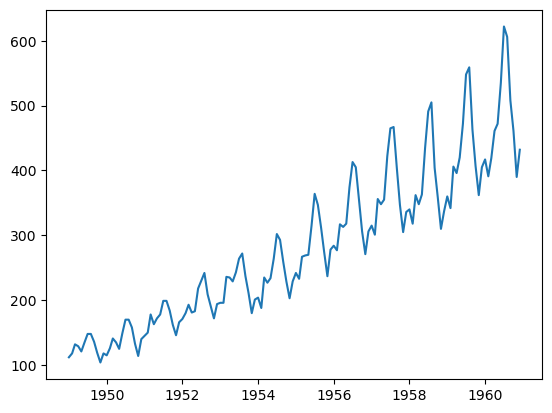

In [7]:
# Visualização da série temporal completa (em formato gráfico - matplotlib)


plt.plot(ts)

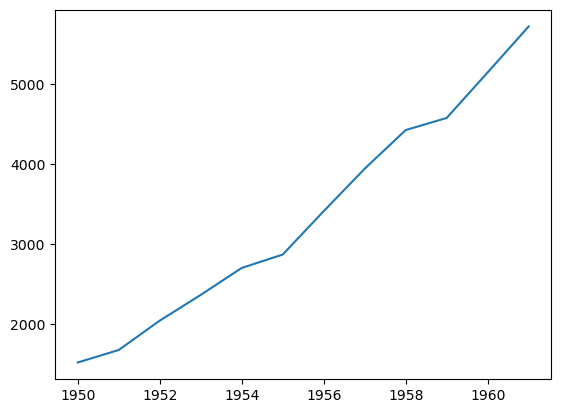

In [9]:
# Visualização por ano (em formato gráfico)


ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

# Obs: "  resample() " -> A função resample() do pandas permite que você reamostre uma série ...
# ...temporal para um intervalo de tempo diferente

# Os principais argumentos da função resample() são:

# 1. rule: o intervalo de tempo para o qual a série será reamostrada. 
# Pode ser uma string, uma frequência ou uma função de agregação.

# 2. fill_value: o valor que será usado para preencher os valores ausentes. O valor padrão é NaN.

# 3. how: o método a ser usado para preencher os valores ausentes. 
# Os métodos disponíveis são pad, bfill, ffill e nearest.

# 4. limit: o número máximo de valores ausentes consecutivos a serem preenchidos. 
# O valor padrão é 1.

# 5. axis: o eixo ao longo do qual a reamostragem será realizada. 
# O valor padrão é 0, ou seja, a reamostragem é realizada ao longo do eixo do tempo

# Ex:
    
# Cria uma série temporal com dados mensais
# ts = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
#                index=pd.date_range('2022-01-01', '2023-01-01', freq='M'))

# Reamostra a série para intervalos anuais
#ts_re = ts.resample('A').sum()

# Imprime a série reamostrada
# print(ts_re)


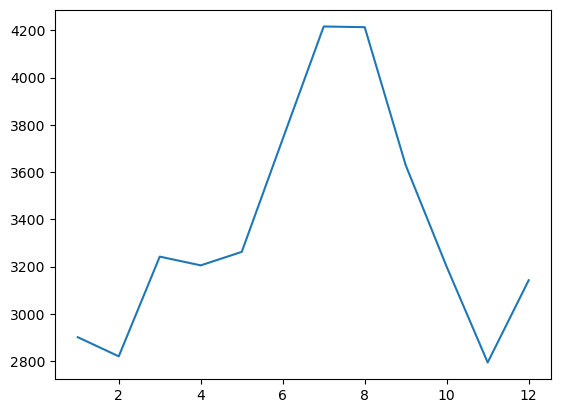

In [10]:
# Visualização por mês (em formato gráfico)


ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

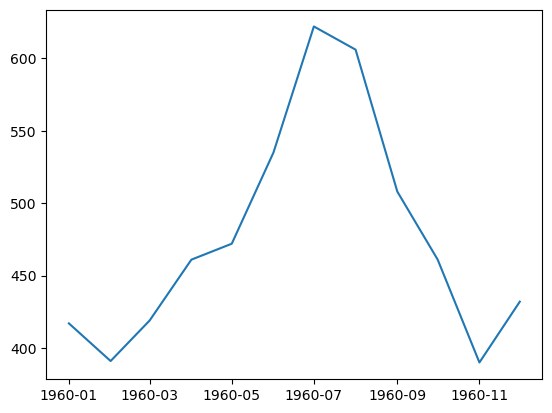

In [11]:
# Visualização entre datas específicas (em formato gráfico)


ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

In [ ]:
# SERIES TEMPORAIS p2

In [ ]:
# DECOMPOSIÇÃO

In [1]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# Registro de converters para uso do matplotlib

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregamento da base de dados
# Conversão do atributo para data e criação da série temporal (ts)


dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                  index_col = 'Month', date_parser = dateparse)

ts = base['#Passengers']

base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


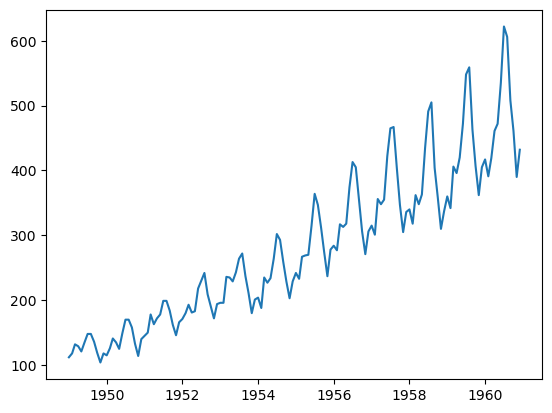

In [4]:
# Visualização gráfica da série temporal


plt.plot(ts)

In [9]:
# Decomposição da série temporal


decomposicao = seasonal_decompose(ts)

# A função **seasonal_decompose()** é uma ferramenta para decompor uma série temporal em seus componentes sistemáticos: nível, tendência, sazonalidade e ruído. 
# Ela pode ser usada para analisar e modelar os padrões de uma série temporal e facilitar a previsão. 
# A função seasonal_decompose pertence ao pacote statsmodels, que é um módulo Python para estatística e econometria. 

# A função seasonal_decompose tem os seguintes parâmetros:

# - x: uma série temporal, que pode ser um objeto pandas ou um array_like.
# - model: o tipo de componente sazonal, que pode ser "additive" ou "multiplicative". 
# O modelo aditivo assume que os componentes são somados, enquanto o modelo multiplicativo assume que os componentes são multiplicados.
# - filt: os coeficientes do filtro para remover o componente sazonal. O método de média móvel usado no filtro é determinado pelo parâmetro two_sided.
# - period: o período da série, que deve ser usado se x não for um objeto pandas ou se o índice de x não tiver uma frequência. 
# Sobrepõe a periodicidade padrão de x se x for um objeto pandas com um índice de séries temporais.
# - two_sided: o método de média móvel usado no filtro. Se True (padrão), uma média móvel centrada é calculada usando o filt.
# Se False, os coeficientes do filtro são apenas para valores passados.
# - extrapolate_trend: se maior que 0, a tendência resultante da convolução é extrapolada linearmente nas duas extremidades 
# (ou na única se two_sided for False) considerando esse número (+1) de pontos mais próximos. Se for 'freq', use os pontos mais próximos da frequência. 
# Definir esse parâmetro resulta em nenhum valor NaN nos componentes de tendência ou residuais.

# A função seasonal_decompose retorna um objeto DecomposeResult, que tem os atributos seasonal, trend e resid, que são os componentes sazonal, 
# de tendência e residual da série temporal, respectivamente. 
# A função seasonal_decompose também pode ser usada para plotar os resultados usando o método plot do objeto DecomposeResult. 

In [11]:
# Tendência


tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [12]:
# Sazonalidade


sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [13]:
# Erro


aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

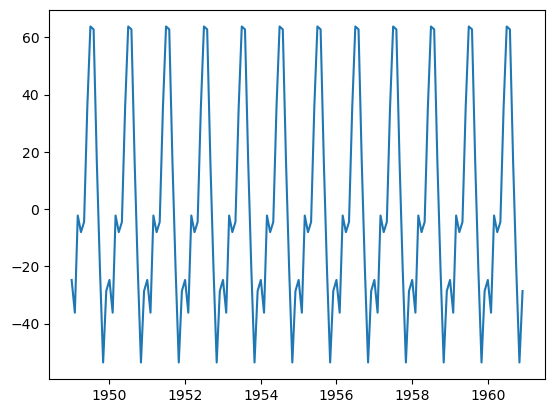

In [14]:
# Visualização do gráfico para cada formato da série temporal
# Sazonal


plt.plot(sazonal)

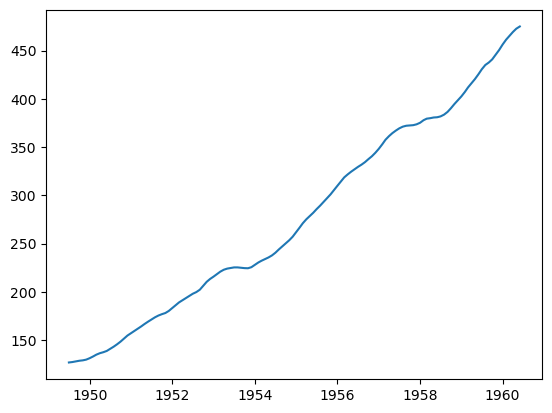

In [15]:
# Tendência

plt.plot(tendencia)

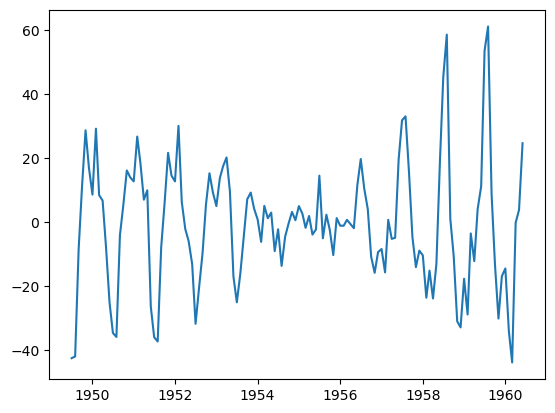

In [16]:
# Erro

plt.plot(aleatorio)

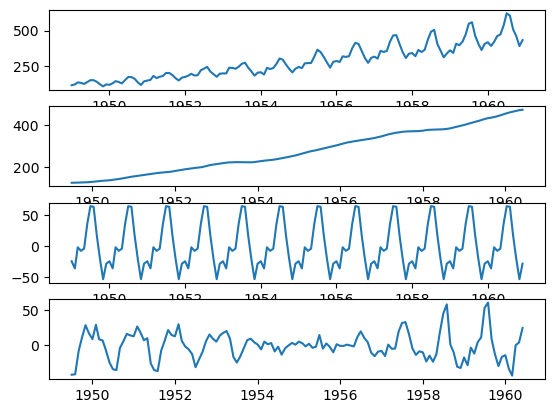

In [17]:
# Visualização de todos os gráficos juntos


# Visualização do original



plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Original')

# Visualização da tendencia
plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')

# Visualização da Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')

# Visualização do Elemento Aleatório
plt.subplot(4, 1, 4)
plt.plot(aleatorio, label = 'Elemento Aleatório')

In [ ]:
# ARIMA - PREVISÃO DE SÉRIES TEMPORAIS, p3

In [1]:
# Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
# Necessidade de instalação da biblioteca pmdarima

In [ ]:
!pip install pmdarima
# from pmdarima.arima import auto_arima

In [2]:
# Importação da biblioteca auto_arima
from pmdarima.arima import auto_arima

In [3]:
# Conversão dos atributos que estão no formato string para o formato ano-mês


dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)

# Obs: Ele atribui aos index, o nome de 'Month'

In [5]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


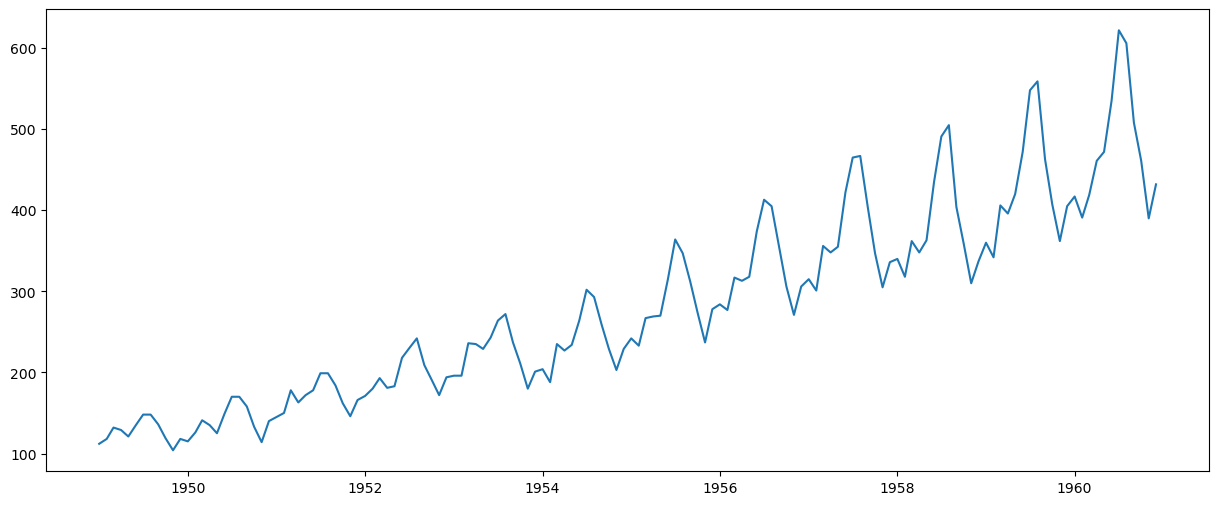

In [6]:
# Exibir gráfico com os dados

plt.plot(data)

In [7]:
# Uso da ferramenta - auto_arima - criar o modelo


stepwise_model = auto_arima(data, start_p=1, start_q=1, start_d=0, 
                           start_P=0, max_p=6, max_q=6, m=12,
                           seasonal=True,
                           trace=True,
                           stepwise=True)

# Obs: " auto_arima " -> técnica estatística para modelar séries temporais. 
# baseada na hipótese de que a série temporal pode ser descrita como uma combinação de uma tendência linear, um componente sazonal e um componente estocástico.

# Retorna um objeto ARIMA, que contêm as seguintes informações:

#     Os parâmetros do modelo ARIMA -> AR, MA, e de diferenciação
#     O erro do modelo ARIMA
#     O desempenho do modelo ARIMA


# Obs: "Argumentos / parâmetros utilizados"

# start_ & max_ -> incício e fim dos parâmetros seguintes.

# data: Os dados para o modelo ARIMA.
# start_p: O valor inicial para o parâmetro AR.
# start_q: O valor inicial para o parâmetro MA.
# start_d: O valor inicial para o parâmetro de diferenciação.
# start_P: O valor inicial para o parâmetro SAR.
# max_p: O valor máximo para o parâmetro AR.
# max_q: O valor máximo para o parâmetro MA.
# m: O número de períodos sazonais. Por exemplo, se os dados tiverem 12 períodos por estação, então m deve ser definido como 12.
# seasonal: Um booleano que indica se o modelo deve ser sazonal.
# trace: Um booleano que indica se deve ser impresso um registro das etapas do algoritmo de seleção de parâmetros.
# stepwise: Um booleano que indica se o algoritmo de seleção de parâmetros deve usar um procedimento passo a passo.

# parâmetro AR (p) -> mede a influência dos valores anteriores na série temporal. 
# Por exemplo, um parâmetro AR de 2 significa que os dois valores anteriores na série temporal ...
# ...são usados para prever o próximo valor

# parâmetro MA (q) -> mede a influência dos erros anteriores na série temporal. Por exemplo, um parâmetro MA de 2 ...
# ...significa que os dois erros anteriores na série temporal são usados para prever o próximo valor

# parâmetro de diferenciação (d) -> é usado para remover a tendência linear da série temporal. 
# Isso é feito subtraindo o valor anterior da série temporal do valor atual

# parâmetro SAR (P) -> mede a influência dos valores anteriores no componente sazonal da série temporal. 
# Por exemplo, um parâmetro SAR de 2 significa que os dois valores anteriores ...
# ... no componente sazonal da série temporal são usados para prever o próximo valor 

# Obs: AR e SAR diferem porque o primeiro usa os dois valores anteriores da série temporal...
# enquanto o SAR utiliza os dois valores anteriores "No componente sazonal da série temporal".

# Obs: start_q/p - max_q/p -> Podem ter valores mais dilatados do que a operação acima; caso o max_ fosse 8...
# ... o teste seria realizado com até oito valores anteriores; isso aumentaria a quantidade de testes realizado pelo auto_arima
# ... o que proporcionaria mais precisão, gerando qualidade de ajustes (AIC) menores(ou seja, ajustes aperfeiçoados) ...
# ..., mas aumentaria o tempo de execução, para disponibilização dos dados, exigindo mais da máquina. 
# Trata-se apenas de uma decisão baseada na necessidade de precisão caso a caso.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.49 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [8]:
# Print do valor do aic


print(stepwise_model.aic())

# Obs: " auto_arima.aic() " -> Retorna o valor do critério de informação Akaike (AIC) para o modelo ARIMA ...
# ...selecionado pelo método auto_arima(). 
# O AIC é uma medida da qualidade do ajuste do modelo à série temporal. 
# Um valor menor de AIC indica um melhor ajuste do modelo

1019.1780567487631


In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
# Criação dos objetos de treino e de teste (train e test)


train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [ ]:
train

In [ ]:
test

In [ ]:
# Ajustar modelo aos dados para treiná-lo


stepwise_model.fit(train)

In [14]:
# Criar um objeto, usando o modelo, para prever o ano subsequente aos utilizados no treino


future_forecast = stepwise_model.predict(n_periods=12)


# Obs: O parâmetro "n_periods" na função predict() é o número de períodos para os quais você deseja fazer previsões. 
# Por exemplo, se você definir n_periods como 12, a função fará previsões para os próximos 12 períodos.

1960-01-01    421.153373
1960-02-01    401.605753
1960-03-01    462.083577
1960-04-01    450.826711
1960-05-01    475.124360
1960-06-01    529.774276
1960-07-01    605.741141
1960-08-01    618.774117
1960-09-01    516.769043
1960-10-01    463.571231
1960-11-01    417.168988
1960-12-01    458.049056
Freq: MS, dtype: float64

In [ ]:
# Criar um Data Frame 


future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['#Passangers'])

# Obs: "pandas.DataFrame" -> usada para criar um objeto DataFrame. 
# Um objeto DataFrame é uma estrutura de dados bidimensional que contém linhas e colunas. 
# As linhas são chamadas de registros e as colunas são chamadas de variáveis. 
# A função pandas.DataFrame() aceita vários argumentos, incluindo:

#     data: Uma lista de listas, uma lista de dicionários ou um dicionário.
#     columns: Uma lista de nomes de colunas.
#     index: Uma lista de índices de linhas.


In [28]:
future_forecast.head()

,#Passangers
Month,
1960-01-01,421.153373
1960-02-01,401.605753
1960-03-01,462.083577
1960-04-01,450.826711
1960-05-01,475.124360


<Axes: xlabel='Month'>

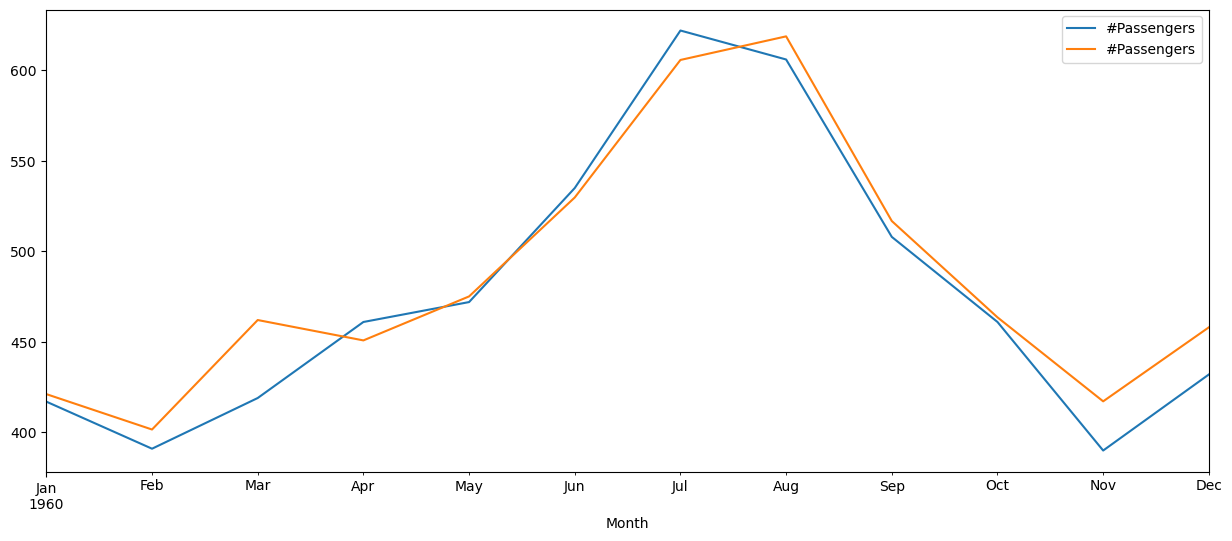

In [16]:
# visualização gráfica do comparação dos dados do último ano, com a previsão do modelo para o último ano


pd.concat([test, future_forecast], axis=1).plot()


# Obs: " pandas.concat( ) " -> usada para concatenar objetos pandas, como DataFrames, Series e objetos Index. 
# A função pandas.concat() aceita vários argumentos, incluindo:
    
    # objs: Uma lista de objetos pandas a serem concatenados.
    # axis: O eixo ao longo do qual os objetos serão concatenados.
    # keys: Uma lista de chaves a serem usadas para indexar os objetos concatenados.
    # names: Um nome para o objeto concatenado.
    # join: O tipo de junção a ser usado quando os objetos têm índices diferentes.
    # ignore_index: Se True, os índices dos objetos concatenados serão ignorados e um novo índice será criado.

<Axes: xlabel='Month'>

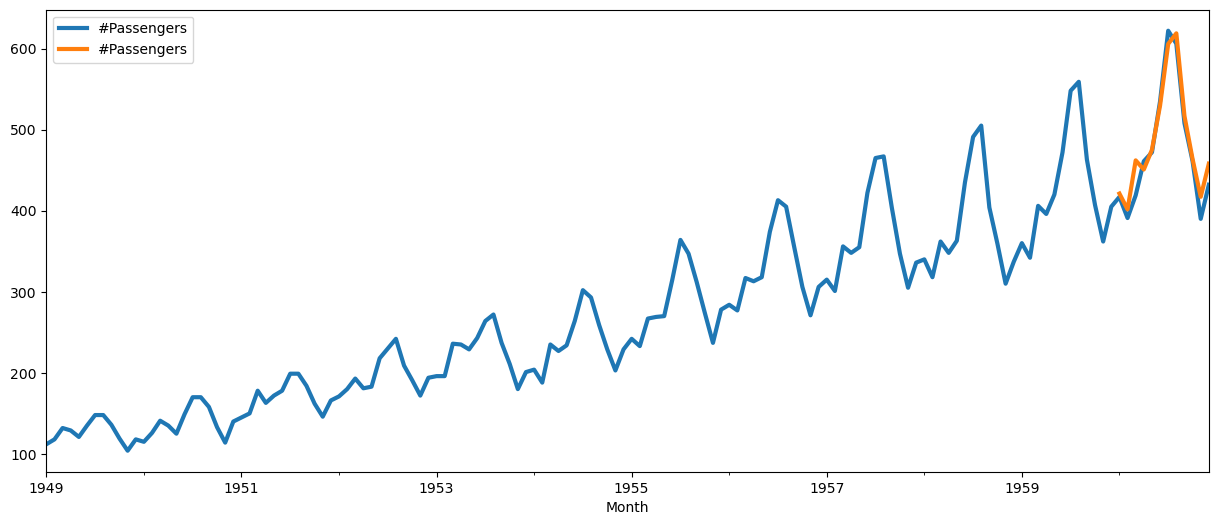

In [17]:
# visualização gráfica comparando a linha dos dados com a previsão para o último ano


pd.concat([data, future_forecast], axis=1).plot(linewidth=3)

# Obs: " linewidth " ->  usado para especificar a largura da linha do gráfico. 
# O valor padrão do parâmetro linewidth é 1. 
# Se você definir o parâmetro linewidth como 3, a linha do gráfico terá 3 pixels de largura

In [1]:
# Obs: Sobre o parâmetro " axis ":
# O valor de axis corresponde aos eixos do DataFrame. O eixo 0 é o eixo das linhas e o eixo 1 é o eixo das colunas
# Se você ocultar axis, o retorno será um DataFrame com os dois DataFrames concatenados ao longo das linhas. 
# Isso ocorre porque o valor padrão de axis é "0".

In [ ]:
# Obs: Sobre a diferença entre as expressões funcionais: x.max() & max(x)

# Há duas maneiras de chamar uma função em Python: usando o método do objeto ou usando a função built-in. O método do objeto é usado ...
# ...para chamar uma função que é um método de um objeto, enquanto a função built-in é usada para chamar uma função que é parte ...
# ...do Python padrão.

# No caso de x.max() e max(x), x.max() é o método do objeto, enquanto max(x) é a função built-in. 
# A diferença técnica entre as duas é que x.max() retorna o valor máximo do objeto x, enquanto max(x) retorna o valor máximo de ...
# ...uma lista de argumentos.

# Por exemplos, se a função x.max() for aplicada a uma string, retornará um erro, isso porque strings não têm um método max().
# No entanto, max(x) ainda funciona, pois max(x) é uma função built-in que pode lidar com qualquer tipo de objeto, incluindo strings

# Em geral, é melhor usar o método do objeto sempre que possível, pois ele é mais eficiente e mais legível. 
# No entanto, se o objeto não tiver um método do objeto, a função built-in ainda funcionará